In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("3170.csv", parse_dates=["DATE"])

# Filter data between the specified dates
filtered_df = df[(df["DATE"] >= "1948-12-01") & (df["DATE"] <= "1967-11-30")]

# Define the seasons
seasons = {
    "spring": [3, 4, 5],  # March, April, May
    "summer": [6, 7, 8],  # June, July, August
    "autumn": [9, 10, 11],  # September, October, November
    "winter": [12, 1, 2]   # December, January, February
}


# Iterate over seasons
for season, months in seasons.items():
    season_df = filtered_df[filtered_df["DATE"].dt.month.isin(months)]
    
    # Concatenate the seasons over the years into a single CSV
    season_df.to_csv(f"{season}1948_1967.csv", index=False)
    
   
    
    # Create a reversed version
    df_reverted = season_df.iloc[::-1].reset_index(drop=True)
    df_reverted.to_csv(f"{season}REV1948_1967.csv", index=False)
    
    

print("CSV files for each season and their reversed versions have been created.")


CSV files for each season and their reversed versions have been created.


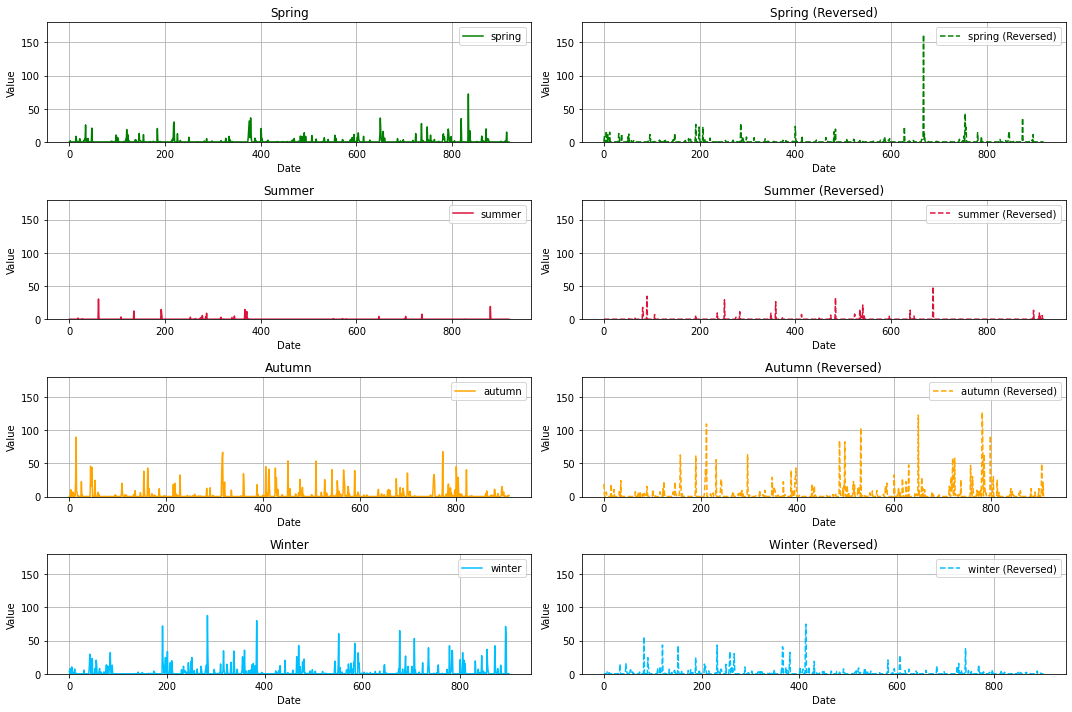

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons and their respective colors
seasons = ["spring", "summer", "autumn", "winter"]
colors = {
    "spring": "green",
    "summer": "crimson",
    "autumn": "orange",
    "winter": "deepskyblue"
}

# Initialize a figure with a grid
fig, axes = plt.subplots(len(seasons), 2, figsize=(15, 10))

# Iterate over seasons to plot them on the grid
for idx, season in enumerate(seasons):
    # Original data
    df = pd.read_csv(f"{season}2002_2012.csv", parse_dates=["DATE"])  # Use consistent filenames
    ax1 = axes[idx, 0]
    ax1.plot(df.index, df["VALUE"], label=season, color=colors[season])
    ax1.set_title(f"{season.capitalize()}")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Value")
    ax1.grid(True)
    ax1.set_ylim(0,180)
    ax1.legend(loc='best')
    
    # Reversed data
    df_rev = pd.read_csv(f"{season}2012_2022.csv", parse_dates=["DATE"])  # Use consistent filenames
    ax2 = axes[idx, 1]
    ax2.plot(df_rev.index, df_rev["VALUE"], label=f"{season} (Reversed)", color=colors[season], linestyle='--')
    ax2.set_title(f"{season.capitalize()} (Reversed)")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Value")
    ax2.grid(True)
    ax2.set_ylim(0,180)
    ax2.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [151]:
import pandas as pd

# Define the seasons
seasons = ["spring", "summer", "autumn", "winter"]

for season in seasons:
    # Load the data from {season}.csv and {season}.REV.csv files
    df_original = pd.read_csv(f"{season}2002_2012.csv")
    df_reversed = pd.read_csv(f"{season}REV2002_2012.csv")

    # Ensure both datasets have the same shape. If not, you might want to address why.
    assert df_original.shape == df_reversed.shape, f"Mismatched shape for {season}"

    # Calculate the symmetrical sum and store it in a new DataFrame 'sym'
    sym = pd.DataFrame()
    sym['DATE'] = df_original['DATE']
    sym['SUM'] = (df_original['VALUE'] + df_reversed['VALUE']) / 2

    # Print the 'sym' DataFrame for each season
    print(f"Symmetric sum for {season.capitalize()}:\n")
    print(sym)

    # Store the 'sym' DataFrame in a new CSV file named "{season}.SYMMETRIC.csv"
    sym.to_csv(f"{season}SYMMETRIC2002_2012.csv", index=False)

print("Symmetric CSV files for each season have been created.")


Symmetric sum for Spring:

           DATE  SUM
0    2003-03-01  0.0
1    2003-03-02  0.0
2    2003-03-03  0.9
3    2003-03-04  0.0
4    2003-03-05  0.2
..          ...  ...
915  2012-05-27  0.2
916  2012-05-28  0.0
917  2012-05-29  0.9
918  2012-05-30  0.0
919  2012-05-31  0.0

[920 rows x 2 columns]
Symmetric sum for Summer:

           DATE  SUM
0    2003-06-01  0.0
1    2003-06-02  0.0
2    2003-06-03  0.0
3    2003-06-04  0.0
4    2003-06-05  0.0
..          ...  ...
915  2012-08-27  0.0
916  2012-08-28  0.0
917  2012-08-29  0.0
918  2012-08-30  0.0
919  2012-08-31  0.0

[920 rows x 2 columns]
Symmetric sum for Autumn:

           DATE  SUM
0    2003-09-01  0.8
1    2003-09-02  0.1
2    2003-09-03  1.0
3    2003-09-04  5.1
4    2003-09-05  0.0
..          ...  ...
905  2012-11-26  0.0
906  2012-11-27  5.1
907  2012-11-28  1.0
908  2012-11-29  0.1
909  2012-11-30  0.8

[910 rows x 2 columns]


AssertionError: Mismatched shape for winter

In [150]:
import pandas as pd

# Define the seasons
seasons = ["spring", "summer", "autumn", "winter"]

for season in seasons:
    # Load the data from {season}.csv and {season}.REV.csv files
    df_original = pd.read_csv(f"{season}1948_1967.csv")
    df_reversed = pd.read_csv(f"{season}REV1948_1967.csv")

    # Ensure both datasets have the same shape. If not, you might want to address why.
    assert df_original.shape == df_reversed.shape, f"Mismatched shape for {season}"

    # Calculate the symmetrical sum and store it in a new DataFrame 'sym'
    sym = pd.DataFrame()
    sym['DATE'] = df_original['DATE']
    sym['SUM'] = (df_original['VALUE'] - df_reversed['VALUE']) / 2

    # Print the 'sym' DataFrame for each season
    print(f"Symmetric sum for {season.capitalize()}:\n")
    print(sym)

    # Store the 'sym' DataFrame in a new CSV file named "{season}.SYMMETRIC.csv"
    sym.to_csv(f"{season}ANTISYMMETRIC1948_1967.csv", index=False)

print("Symmetric CSV files for each season have been created.")


Symmetric sum for Spring:

           DATE  SUM
0    1952-03-01  0.0
1    1952-03-02  0.0
2    1952-03-03  0.0
3    1952-03-04  0.0
4    1952-03-05  0.0
..          ...  ...
915  1967-05-27  0.0
916  1967-05-28  0.0
917  1967-05-29  0.0
918  1967-05-30  0.0
919  1967-05-31  0.0

[920 rows x 2 columns]
Symmetric sum for Summer:

           DATE  SUM
0    1952-06-01  0.0
1    1952-06-02 -1.8
2    1952-06-03 -2.7
3    1952-06-04  0.0
4    1952-06-05  1.5
..          ...  ...
915  1967-08-27 -1.5
916  1967-08-28  0.0
917  1967-08-29  2.7
918  1967-08-30  1.8
919  1967-08-31  0.0

[920 rows x 2 columns]
Symmetric sum for Autumn:

           DATE  SUM
0    1952-09-01 -1.2
1    1952-09-02 -2.9
2    1952-09-03 -2.2
3    1952-09-04  0.0
4    1952-09-05  0.0
..          ...  ...
905  1967-11-26  0.0
906  1967-11-27  0.0
907  1967-11-28  2.2
908  1967-11-29  2.9
909  1967-11-30  1.2

[910 rows x 2 columns]
Symmetric sum for Winter:

           DATE  SUM
0    1948-12-01  0.0
1    1948-12-02  0.0
2

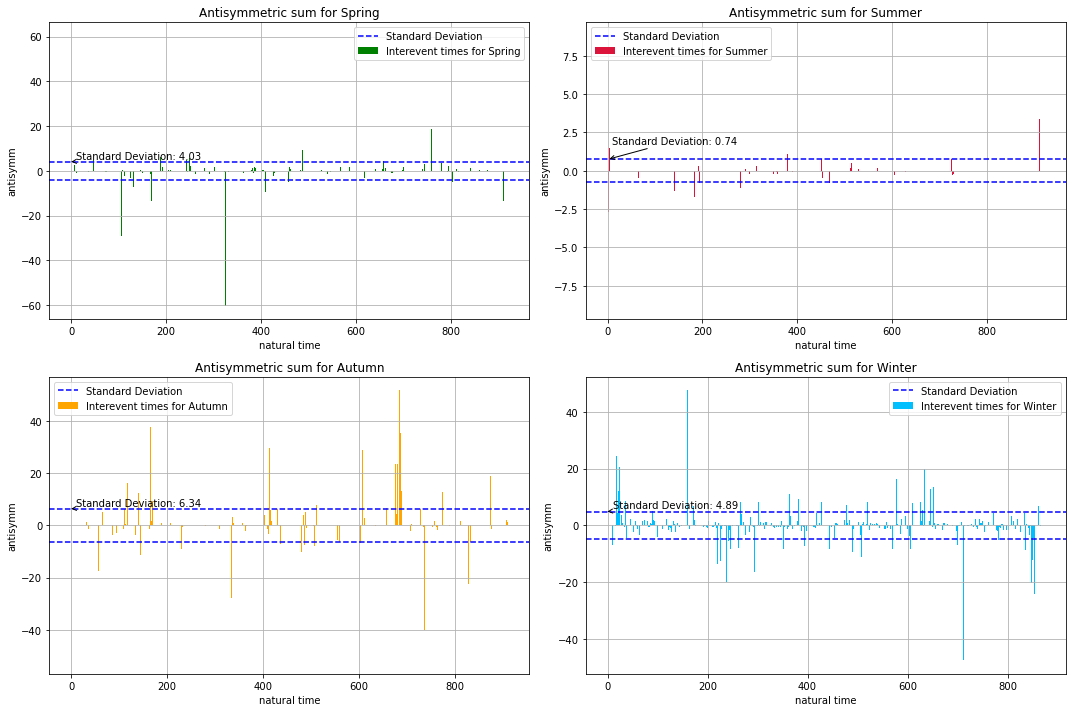

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons and their respective colors
seasons = ["spring", "summer", "autumn", "winter"]
colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}  # "celeste" is similar to light blue

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()  # Flatten the 2x2 grid to iterate easily

for ax, season in zip(axs, seasons):
    # Load the data from the "{season}.ANTISYMMETRIC.csv" file
    df = pd.read_csv(f"{season}ANTISYMMETRIC1948_1967.csv")
    
    # Plotting the data on the respective subplot axis
    ax.bar(df.index, df['SUM'], color=colors[season], label=f'Interevent times for {season.capitalize()}', width=0.6)
    
    # Compute the standard deviation
    std_dev = df['SUM'].std()
    
    # Plot the standard deviation as horizontal lines
    ax.axhline(std_dev, color='b', linestyle='--', label='Standard Deviation')
    ax.axhline(-std_dev, color='b', linestyle='--')
    
    # Annotate the standard deviation value on the plot
    ax.annotate(f'Standard Deviation: {std_dev:.2f}', xy=(0, std_dev), xytext=(10, std_dev + 1),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    ax.set_title(f'Antisymmetric sum for {season.capitalize()}')
    ax.set_xlabel('natural time')
    ax.set_ylabel('antisymm')
    ax.grid(True)
    ax.legend()

# Uncomment the line below if you want to save the figure
# fig.savefig('seasons.ANTISYMMETRIC_plot.jpg', dpi=300)

plt.tight_layout()
plt.show()


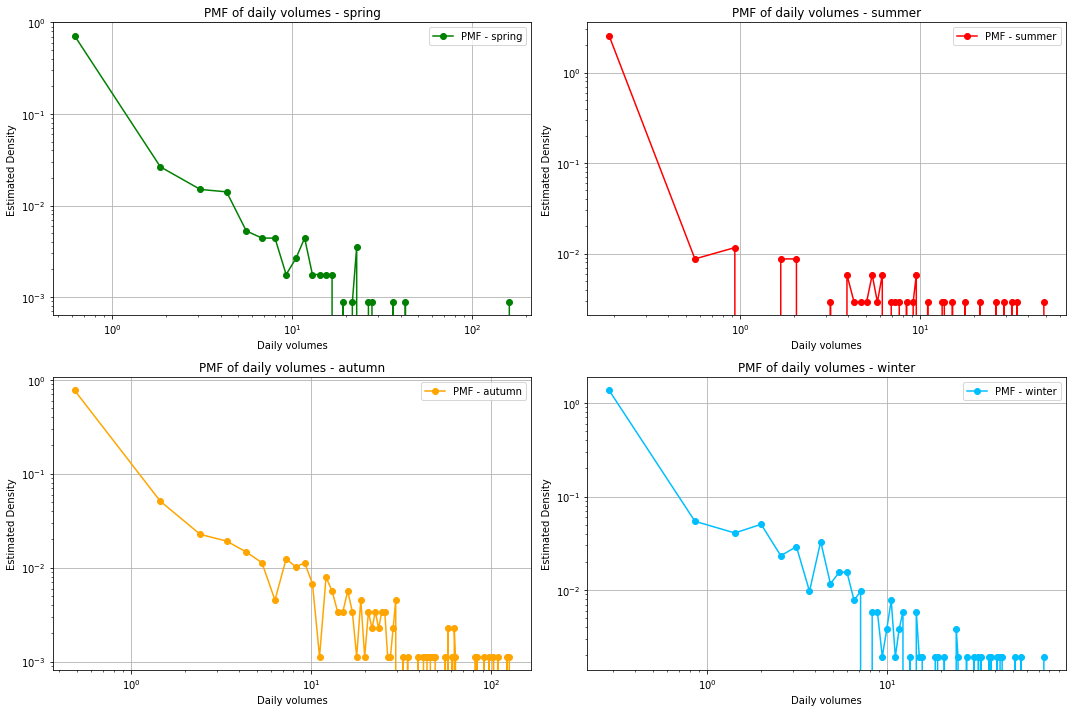

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, norm

# Define the seasons and colors
seasons = ["spring", "summer", "autumn", "winter"]
colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}

# Load the data for PMF from multiple CSV files
pmf_csv_file_paths = [
    'spring2012_2022.csv',
    'summer2012_2022.csv',
    'autumn2012_2022.csv',
    'winter2012_2022.csv',
]

# Create subplots grid
num_rows = 2  # Adjust as needed
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.ravel()

# Plot PMFs for each season
for i, pmf_csv_path in enumerate(pmf_csv_file_paths):
    season = seasons[i]
    color = colors[season]

    pmf_df = pd.read_csv(pmf_csv_path)
    pmf_values = pmf_df['VALUE']
    counts, bin_edges = np.histogram(pmf_values, bins=131, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axes[i].plot(bin_centers, counts, color=color, marker='o', linestyle='-',
                 label=f'PMF - {season}')
    
    axes[i].set_title(f'PMF of daily volumes - {season}')
    axes[i].set_xlabel('Daily volumes')
    axes[i].set_ylabel('Estimated Density')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].grid(True)
    #axes[i].set_ylim(0.0009, 1)
    axes[i].legend(loc='best')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


spring - total values: 920, similar values: 777, percentage: 84.45652173913044
summer - total values: 920, similar values: 863, percentage: 93.80434782608695
autumn - total values: 910, similar values: 693, percentage: 76.15384615384615
winter - total values: 902, similar values: 741, percentage: 82.15077605321508


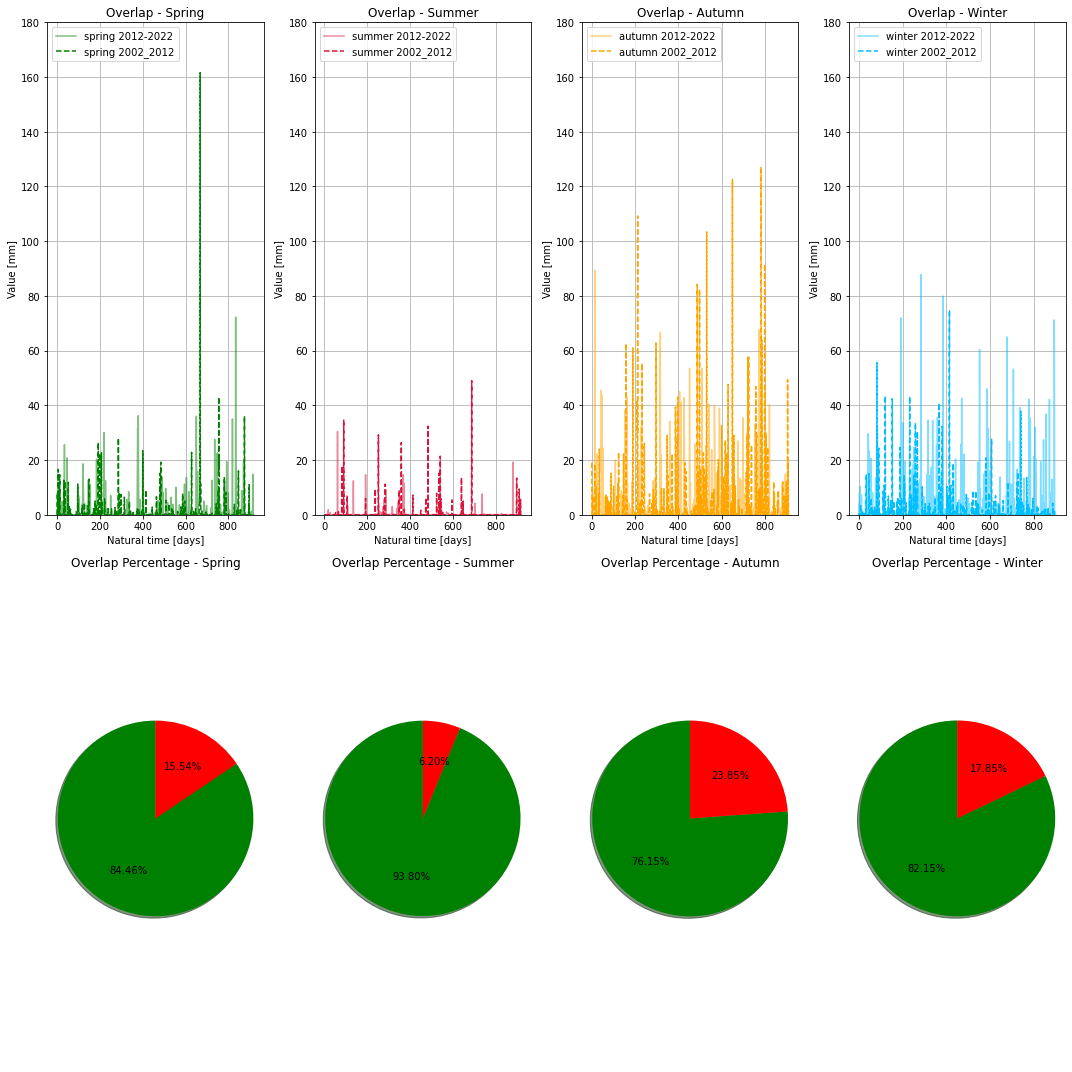

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15, 15))

# Define seasons and their reversed versions
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
season_tolerances = {"spring": 3, "summer": 1, "autumn": 5, "winter": 6}

for i, season in enumerate(seasons, start=1):
    df_original = pd.read_csv(f'{season}2002_2012.csv')
    #df_original = pd.read_csv(f'{season}2012_2022REV.csv')
    
    #{season}ANTISYMMETRICtsallis_values
    df_reversed = pd.read_csv(f'{season}2012_2022.csv')
    tolerance = season_tolerances[season]
    
    plt.subplot(2, 4, i)
    
    # Plot the data
    plt.plot(df_original.index, df_original['VALUE'], label=f'{season} 2012-2022', color=season_colors[season], alpha= 0.5)
    plt.plot(df_reversed.index, df_reversed['VALUE'], label=f'{season} 2002_2012', color=season_colors[season], linestyle='dashed', alpha=1)
    
    # Highlight overlapping data
    similar_indices = []

    for idx in df_original.index:
        if idx < len(df_original) and abs(df_original['VALUE'][idx] - df_reversed['VALUE'][idx]) <= tolerance:
            similar_indices.append(idx)
            #plt.scatter(df_original.index[idx], df_original['VALUE'][idx], color='black', marker='o', s=13)
    
    plt.xlabel('Natural time [days]')
    plt.ylabel('Value [mm]')
    plt.ylim(0,180)
    #plt.xlim(0,100)
    plt.title(f'Overlap - {season.capitalize()}')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    total_values = len(df_original)
    total_similar_values = len(similar_indices)
    percentage_similarity = (total_similar_values / total_values) * 100
    
    print(f"{season} - total values: {total_values}, similar values: {total_similar_values}, percentage: {percentage_similarity}")


    # Pie chart for similarity overlap
    plt.subplot(2, 4, i + 4)
    labels_overlap = ['Overlap', 'Non-overlap']
    sizes_overlap = [percentage_similarity, 100 - percentage_similarity]
    wedges, texts, autotexts = plt.pie(sizes_overlap, colors=['green', 'red'], autopct='%1.2f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'Overlap Percentage - {season.capitalize()}')
        
# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
SHUFFLED

spring - total values: 920, similar values: 782, percentage: 85.0


C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:56: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:57: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']


summer - total values: 920, similar values: 863, percentage: 93.80434782608695


C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:56: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:57: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']


autumn - total values: 910, similar values: 694, percentage: 76.26373626373626


C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:56: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:57: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']


winter - total values: 902, similar values: 745, percentage: 82.59423503325942


C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:56: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_14656\3629551957.py:57: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']


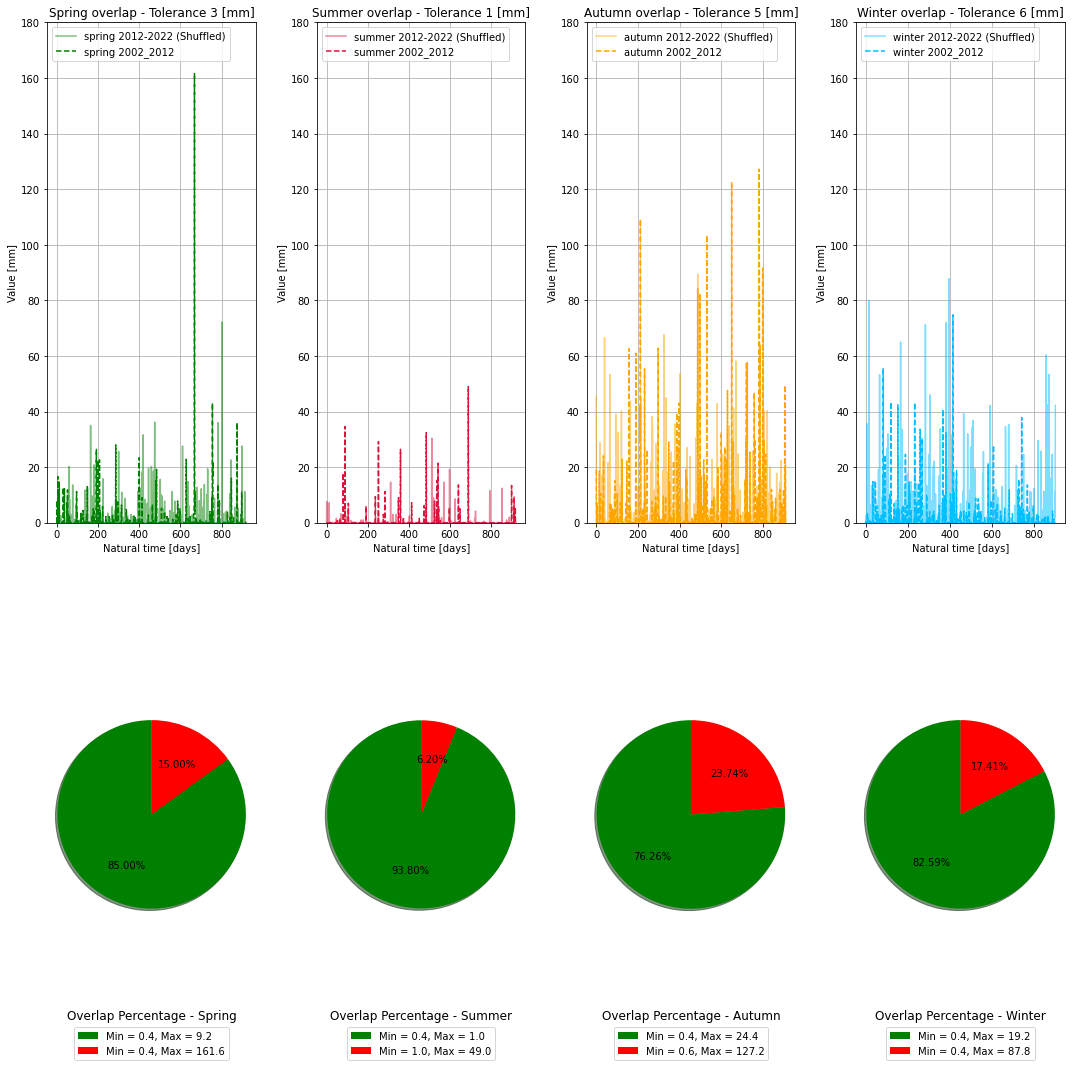

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15, 15))

# Define seasons and their reversed versions
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
season_tolerances = {"spring": 3, "summer": 1, "autumn": 5, "winter": 6}

for i, season in enumerate(seasons, start=1):
    df_original = pd.read_csv(f'{season}2002_2012.csv')
    
    df_reversed = pd.read_csv(f'{season}2012_2022.csv')
    # Shuffle the data
    #df_reversed = df_reversed.sample(frac=1, random_state=33).reset_index(drop=True)
    df_original = df_original.sample(frac=1, random_state=253).reset_index(drop=True)

    
    tolerance = season_tolerances[season]
    
    plt.subplot(2, 4, i)
    
    # Plot the shuffled data
    plt.plot(df_original.index, df_original['VALUE'], label=f'{season} 2012-2022 (Shuffled)', color=season_colors[season], alpha=0.5)
    plt.plot(df_reversed.index, df_reversed['VALUE'], label=f'{season} 2002_2012', color=season_colors[season], linestyle='dashed', alpha=1)
    
    # Highlight overlapping data using the shuffled dataset
    similar_indices = []

    for idx in df_original.index:
        if idx < len(df_original) and abs(df_original['VALUE'][idx] - df_reversed['VALUE'][idx]) <= tolerance:
            similar_indices.append(idx)
    
    plt.xlabel('Natural time [days]')
    plt.ylabel('Value [mm]')
    plt.ylim(0,180)
    plt.title(f'{season.capitalize()} overlap - Tolerance {tolerance} [mm]')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    total_values = len(df_original)
    total_similar_values = len(similar_indices)
    percentage_similarity = (total_similar_values / total_values) * 100
    
    print(f"{season} - total values: {total_values}, similar values: {total_similar_values}, percentage: {percentage_similarity}")
    
    # Calculate min and max Y-values for overlap and non-overlap using the shuffled dataset
    overlap_values_original = df_original.loc[similar_indices, 'VALUE']
    overlap_values_reversed = df_reversed.loc[similar_indices, 'VALUE']
    
    non_overlap_indices_original = set(df_original.index) - set(similar_indices)
    non_overlap_indices_reversed = set(df_reversed.index) - set(similar_indices)
    
    non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
    non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']
    
    # For min values, consider only values greater than 0.2
    min_similar_y_value = min(overlap_values_original[overlap_values_original > 0.2].min(), overlap_values_reversed[overlap_values_reversed > 0.2].min())
    max_similar_y_value = max(overlap_values_original.max(), overlap_values_reversed.max())
    
    min_non_similar_y_value = min(non_overlap_values_original[non_overlap_values_original > 0.2].min(), non_overlap_values_reversed[non_overlap_values_reversed > 0.2].min())
    max_non_similar_y_value = max(non_overlap_values_original.max(), non_overlap_values_reversed.max())

    # Pie chart for similarity overlap using the shuffled dataset
    plt.subplot(2, 4, i + 4)
    labels_overlap = ['Overlap', 'Non-overlap']
    sizes_overlap = [percentage_similarity, 100 - percentage_similarity]
    wedges, texts, autotexts = plt.pie(sizes_overlap, colors=['green', 'red'], autopct='%1.2f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'Overlap Percentage - {season.capitalize()}', y=0.08)
    
    legend_labels = [
        f'Min = {min_similar_y_value}, Max = {max_similar_y_value}',
        f'Min = {min_non_similar_y_value}, Max = {max_non_similar_y_value}'
    ]
    plt.legend(handles=wedges, labels=legend_labels, loc='lower center',  fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.savefig('CTOVERLAP.jpg', dpi=300)
plt.show()


In [ ]:
PERMUTATION

spring - average similarity percentage over 13 permutations: 84.12%
summer - average similarity percentage over 13 permutations: 93.70%
autumn - average similarity percentage over 13 permutations: 76.62%
winter - average similarity percentage over 13 permutations: 82.62%


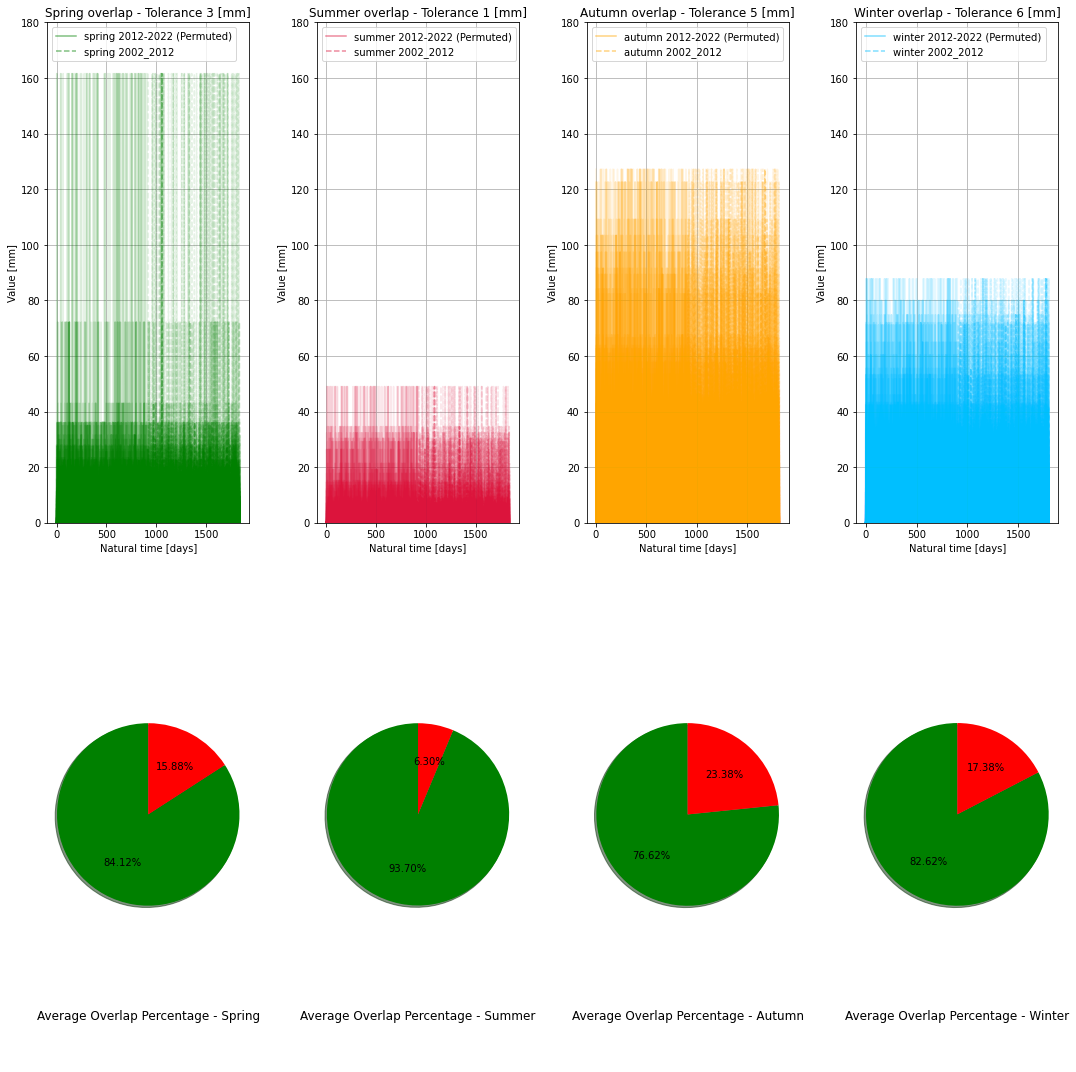

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15, 15))

# Define seasons and their reversed versions
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
season_tolerances = {"spring": 3, "summer": 1, "autumn": 5, "winter": 6}

for i, season in enumerate(seasons, start=1):
    df_original = pd.read_csv(f'{season}2002_2012.csv')
    df_reversed = pd.read_csv(f'{season}2012_2022.csv')
    tolerance = season_tolerances[season]
    
    # Create storage for statistics across permutations
    overall_percentage_similarities = []

    plt.subplot(2, 4, i)
    
    for j in range(170):
        # Combine the two datasets
        combined = pd.concat([df_original['VALUE'], df_reversed['VALUE']]).reset_index(drop=True)

        # Permute the combined data
        permuted = combined.sample(frac=1).reset_index(drop=True)

        # Split the permuted data back into two datasets of the original sizes
        permuted_original = permuted.iloc[:len(df_original)]
        permuted_reversed = permuted.iloc[len(df_original):]
        
        # Plot the permuted data
        if j == 0:
            plt.plot(permuted_original.index, permuted_original, label=f'{season} 2012-2022 (Permuted)', color=season_colors[season], alpha=0.5)
            plt.plot(permuted_reversed.index, permuted_reversed, label=f'{season} 2002_2012', color=season_colors[season], linestyle='dashed', alpha=0.5)
        else:
            plt.plot(permuted_original.index, permuted_original, color=season_colors[season], alpha=0.1)
            plt.plot(permuted_reversed.index, permuted_reversed, color=season_colors[season], linestyle='dashed', alpha=0.1)

        # Check overlapping data using the permuted dataset
        similar_indices = [idx for idx in df_original.index if abs(permuted_original.iloc[idx] - permuted_reversed.iloc[idx]) <= tolerance]
        
        total_values = len(df_original)
        total_similar_values = len(similar_indices)
        percentage_similarity = (total_similar_values / total_values) * 100
        overall_percentage_similarities.append(percentage_similarity)
    
    plt.xlabel('Natural time [days]')
    plt.ylabel('Value [mm]')
    plt.ylim(0,180)
    plt.title(f'{season.capitalize()} overlap - Tolerance {tolerance} [mm]')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    avg_percentage_similarity = sum(overall_percentage_similarities) / len(overall_percentage_similarities)
    print(f"{season} - average similarity percentage over 13 permutations: {avg_percentage_similarity:.2f}%")
    
    # Pie chart for average similarity overlap using the permuted dataset
    plt.subplot(2, 4, i + 4)
    labels_overlap = ['Overlap', 'Non-overlap']
    sizes_overlap = [avg_percentage_similarity, 100 - avg_percentage_similarity]
    wedges, texts, autotexts = plt.pie(sizes_overlap, colors=['green', 'red'], autopct='%1.2f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'Average Overlap Percentage - {season.capitalize()}', y=0.08)

# Adjust the layout
plt.tight_layout()
#plt.savefig('CTOVERLAP.jpg', dpi=300)
plt.show()


In [231]:
print(f"{season} - total values: {total_values}, similar values: {total_similar_values}, percentage: {percentage_similarity}")


winter - total values: 902, similar values: 741, percentage: 82.15077605321508


spring - total values: 920, similar values: 777, percentage: 84.45652173913044
summer - total values: 920, similar values: 863, percentage: 93.80434782608695


C:\Users\verap\AppData\Local\Temp\ipykernel_7932\3822891571.py:49: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_7932\3822891571.py:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_7932\3822891571.py:49: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_7932\3822891571.py:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_value

autumn - total values: 910, similar values: 693, percentage: 76.15384615384615


C:\Users\verap\AppData\Local\Temp\ipykernel_7932\3822891571.py:49: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
C:\Users\verap\AppData\Local\Temp\ipykernel_7932\3822891571.py:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']


winter - total values: 902, similar values: 741, percentage: 82.15077605321508


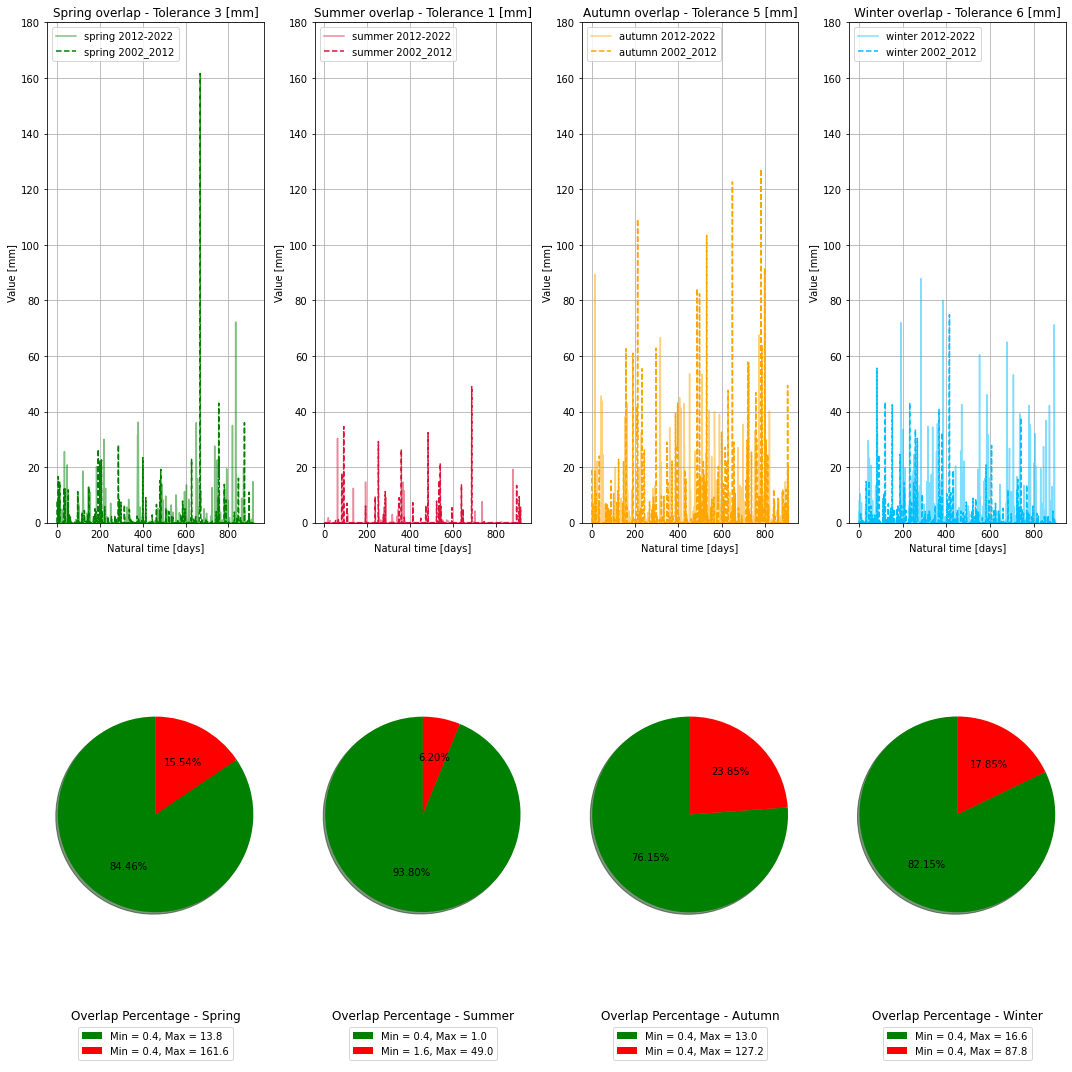

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15, 15))

# Define seasons and their reversed versions
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
season_tolerances = {"spring": 3, "summer": 1, "autumn": 5, "winter": 6}

for i, season in enumerate(seasons, start=1):
    df_original = pd.read_csv(f'{season}2002_2012.csv')
    df_reversed = pd.read_csv(f'{season}2012_2022.csv')
    tolerance = season_tolerances[season]
    
    plt.subplot(2, 4, i)
    
    # Plot the data
    plt.plot(df_original.index, df_original['VALUE'], label=f'{season} 2012-2022', color=season_colors[season], alpha=0.5)
    plt.plot(df_reversed.index, df_reversed['VALUE'], label=f'{season} 2002_2012', color=season_colors[season], linestyle='dashed', alpha=1)
    
    # Highlight overlapping data
    similar_indices = []

    for idx in df_original.index:
        if idx < len(df_original) and abs(df_original['VALUE'][idx] - df_reversed['VALUE'][idx]) <= tolerance:
            similar_indices.append(idx)
    
    plt.xlabel('Natural time [days]')
    plt.ylabel('Value [mm]')
    plt.ylim(0,180)
    plt.title(f'{season.capitalize()} overlap - Tolerance {tolerance} [mm]')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    total_values = len(df_original)
    total_similar_values = len(similar_indices)
    percentage_similarity = (total_similar_values / total_values) * 100
    
    print(f"{season} - total values: {total_values}, similar values: {total_similar_values}, percentage: {percentage_similarity}")
# Calculate min and max Y-values for overlap and non-overlap
    overlap_values_original = df_original.loc[similar_indices, 'VALUE']
    overlap_values_reversed = df_reversed.loc[similar_indices, 'VALUE']
    
    non_overlap_indices_original = set(df_original.index) - set(similar_indices)
    non_overlap_indices_reversed = set(df_reversed.index) - set(similar_indices)
    
    non_overlap_values_original = df_original.loc[non_overlap_indices_original, 'VALUE']
    non_overlap_values_reversed = df_reversed.loc[non_overlap_indices_reversed, 'VALUE']
    
    # For min values, consider only values greater than 0.2
    min_similar_y_value = min(overlap_values_original[overlap_values_original > 0.2].min(), overlap_values_reversed[overlap_values_reversed > 0.2].min())
    max_similar_y_value = max(overlap_values_original.max(), overlap_values_reversed.max())
    
    min_non_similar_y_value = min(non_overlap_values_original[non_overlap_values_original > 0.2].min(), non_overlap_values_reversed[non_overlap_values_reversed > 0.2].min())
    max_non_similar_y_value = max(non_overlap_values_original.max(), non_overlap_values_reversed.max())

    # Pie chart for similarity overlap
    plt.subplot(2, 4, i + 4)
    labels_overlap = ['Overlap', 'Non-overlap']
    sizes_overlap = [percentage_similarity, 100 - percentage_similarity]
    wedges, texts, autotexts = plt.pie(sizes_overlap, colors=['green', 'red'], autopct='%1.2f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'Overlap Percentage - {season.capitalize()}', y=0.08)
    
    legend_labels = [
        f'Min = {min_similar_y_value}, Max = {max_similar_y_value}',
        f'Min = {min_non_similar_y_value}, Max = {max_non_similar_y_value}'
    ]
    plt.legend(handles=wedges, labels=legend_labels, loc='lower center',  fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.savefig('CTOVERLAP.jpg', dpi=300)
plt.show()


In [ ]:
END

In [239]:
pip install torch torchvision


  Using cached torchvision-0.15.2-cp39-cp39-win_amd64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\verap\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\verap\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\verap\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\verap\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\verap\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\verap\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\verap\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\verap\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
Con

In [ ]:
START PREDICTION

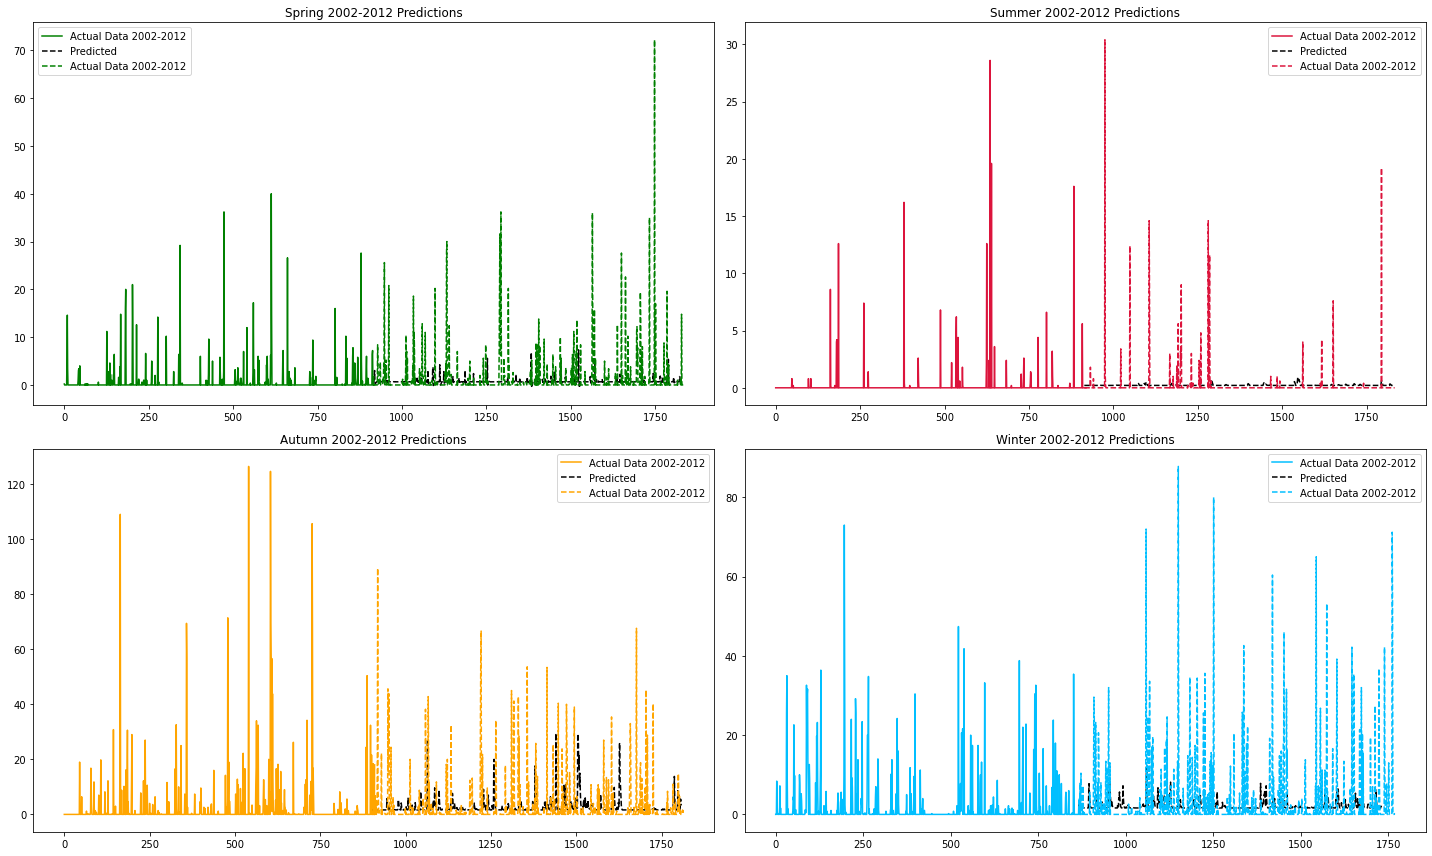

In [38]:
#prediction using 15 days before the day we want to predict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.optim import Adam

# Define a function to create the dataset in the required format


def create_dataset(data, look_back=15):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data[i + look_back])
    return np.array(dataX), np.array(dataY)

# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])  # Get the output from the last time step
        return out

# Hyperparameters
look_back = 5
hidden_size = 70
num_epochs = 150

seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}

plt.figure(figsize=(20, 12))

# Let's modify the loop to load two datasets: the training dataset (1987-2002) and the validation dataset (2002-2012)

for idx, season in enumerate(seasons, start=1):
    # 1. Load and preprocess training data (1987-2002)
    train_data = pd.read_csv(f'{season}1987_2002.csv')['VALUE'].values.reshape(-1, 1)
    scaled_train_data, scaler = preprocess_data(train_data)
    
    # Create training datasets
    X_train, Y_train = create_dataset(scaled_train_data, look_back)
    
    # Convert to PyTorch tensor
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(X_train.shape[0], look_back, 1)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

    # 2. Train the LSTM
    model = LSTMModel(input_size=1, hidden_size=hidden_size)
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 3. Load and preprocess validation data (2002-2012) using the previous scaler
    val_data = pd.read_csv(f'{season}1987_2002.csv')['VALUE'].values.reshape(-1, 1)
    scaled_val_data = scaler.transform(val_data)
    
    # Create validation datasets
    X_val, Y_val = create_dataset(scaled_val_data, look_back)
    
    # Convert to PyTorch tensor
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).view(X_val.shape[0], look_back, 1)
    
    # 4. Predict
    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor)
    predictions = scaler.inverse_transform(predictions.numpy())

    # Plot the results
    plt.subplot(2, 2, idx)
    plt.plot(val_data, color=season_colors[season], label="Actual Data 2002-2012")
    
    # The plotting offset
    offset = len(train_data) - look_back - 1
    plt.plot(np.arange(offset, offset + len(predictions)), predictions, color='black', linestyle='dashed', label="Predicted")
    
     # 7. Load actual data for 2002-2012
    actual_2002_2012 = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    plt.plot(np.arange(offset, offset + len(actual_2002_2012)), actual_2002_2012, color=season_colors[season],linestyle='dashed', label="Actual Data 2002-2012")
    plt.title(f"{season.capitalize()} 2002-2012 Predictions")
    plt.legend()

plt.tight_layout()
plt.show()


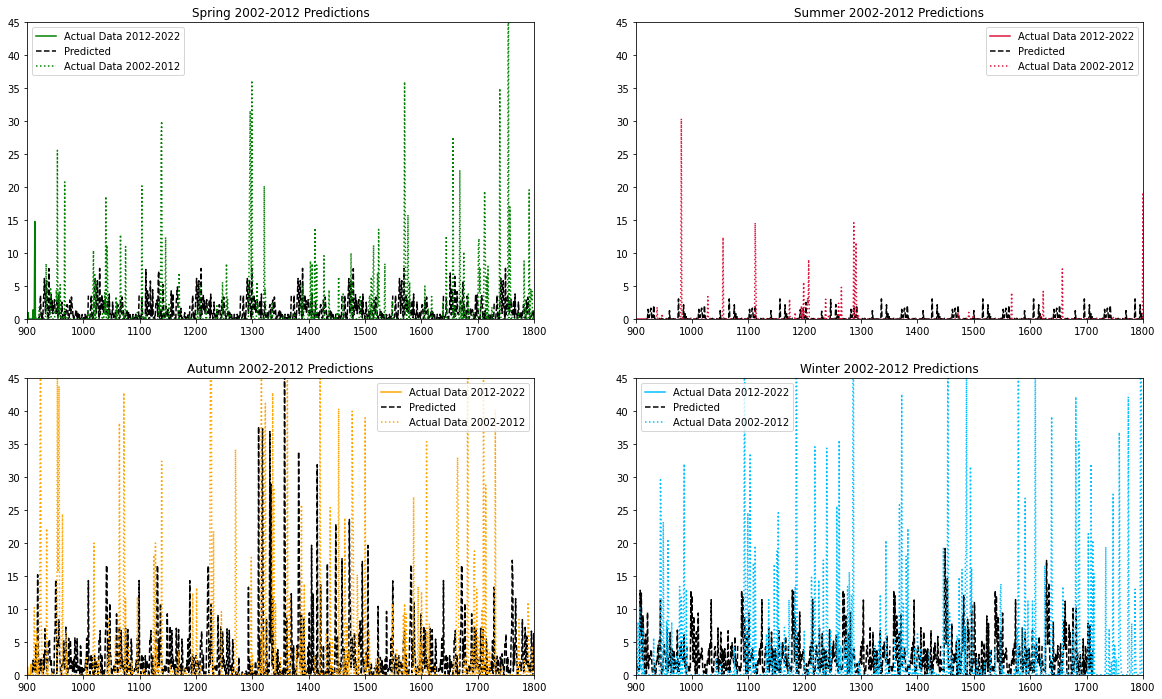

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.optim import Adam


#look_back: This specifies how many previous time steps are used as input features.
#interval: This specifies how many time steps you want to predict into the future
#no percentage compited

# Function to create dataset based on intervals
def create_dataset(data, look_back=90, interval=90):
    dataX, dataY = [], []
    for i in range(0, len(data) - look_back, interval):
        if i + look_back + interval <= len(data):
            dataX.append(data[i:(i + look_back)])
            dataY.append(data[i + look_back:i + look_back + interval])
    return np.array(dataX), np.array(dataY)

# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, output_size=90):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

# Hyperparameters
look_back = 5
hidden_size = 70
num_epochs = 150
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
plt.figure(figsize=(20, 12))

# Training and plotting loop
for idx, season in enumerate(seasons, start=1):
    # 1. Load and preprocess training data (1987-2002)
    train_data = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    scaled_train_data, scaler = preprocess_data(train_data)
    
    # Create training datasets
    X_train, Y_train = create_dataset(scaled_train_data, look_back)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(X_train.shape[0], look_back, 1)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).view(Y_train.shape[0], 90)

    # 2. Train the LSTM
    model = LSTMModel(input_size=1, hidden_size=hidden_size)
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 3. Load and preprocess validation data (2002-2012) using the previous scaler
    val_data = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    scaled_val_data = scaler.transform(val_data)
    
    # Create validation datasets
    X_val, Y_val = create_dataset(scaled_val_data, look_back)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).view(X_val.shape[0], look_back, 1)

    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor)
    predictions = scaler.inverse_transform(predictions.numpy().reshape(-1, 1))

    # Plot
    plt.subplot(2, 2, idx)
    plt.plot(val_data, color=season_colors[season], label="Actual Data 2012-2022")

    for i, start_point in enumerate(range(0, len(val_data) - look_back, 90)):
        offset = start_point + len(train_data)
        interval_predictions = predictions[i * 90: (i + 1) * 90].flatten()
        if len(interval_predictions) == 0:
            continue
        plt.plot(np.arange(offset, offset + len(interval_predictions)), interval_predictions, color='black', linestyle='dashed', label="Predicted" if i == 0 else "")

    # Assuming the length of the actual_2002_2012 matches the length of val_data
    offset_actual = len(train_data)
    actual_2002_2012 = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    plt.plot(np.arange(offset_actual, offset_actual + len(actual_2002_2012)), actual_2002_2012, color=season_colors[season], linestyle='dotted', label="Actual Data 2002-2012")
    plt.ylim(0,45)
    plt.xlim(900,1800)
    plt.title(f"{season.capitalize()} 2002-2012 Predictions")
    plt.legend()
plt.show()


In [117]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached grpcio-1.57.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none


KeyboardInterrupt



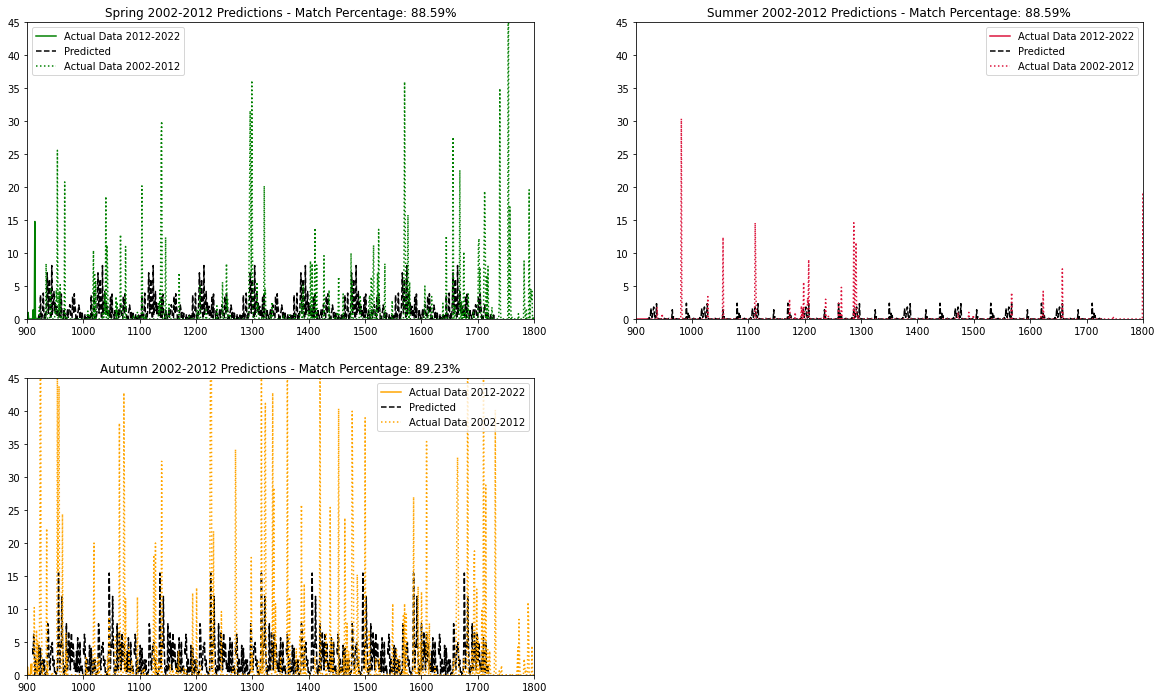

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.optim import Adam


#interval: This specifies how many time steps you want to predict into the future

# Function to create dataset based on intervals
def create_dataset(data, look_back=90, interval=90):
    dataX, dataY = [], []
    for i in range(0, len(data) - look_back, interval):
        if i + look_back + interval <= len(data):
            dataX.append(data[i:(i + look_back)])
            dataY.append(data[i + look_back:i + look_back + interval])
    return np.array(dataX), np.array(dataY)


# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=50, output_size=90):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.relu = nn.ReLU()  # Add ReLU activation layer
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.relu(out)  # Apply ReLU activation
        out = self.linear(out[:, -1, :])
        return out

def percentage_of_matches(actual, predictions, x_tolerance=5, y_tolerance=50):
    matches = 0
    for i, pred_val in enumerate(predictions):
        for j in range(max(0, i - x_tolerance), min(len(actual), i + x_tolerance + 1)):
            if abs(pred_val - actual[j]) <= y_tolerance:
                matches += 1
                break
                
    return (matches / len(predictions)) * 100


# Hyperparameters
look_back = 90
hidden_size = 3
num_epochs = 150
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
plt.figure(figsize=(20, 12))

# Training and plotting loop
for idx, season in enumerate(seasons, start=1):
    # 1. Load and preprocess training data (1987-2002)
    train_data = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    scaled_train_data, scaler = preprocess_data(train_data)
    
    # Create training datasets
    X_train, Y_train = create_dataset(scaled_train_data, look_back)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(X_train.shape[0], look_back, 1)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).view(Y_train.shape[0], 90)



# 2. Train the LSTM
    model = LSTMModel(input_size=1, hidden_size=hidden_size)
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=0.01)
    
    for epoch in range(num_epochs):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 3. Load and preprocess validation data (2002-2012) using the previous scaler
    val_data = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    scaled_val_data = scaler.transform(val_data)
    
    # Create validation datasets
    X_val, _ = create_dataset(scaled_val_data, look_back)  # Use underscore to ignore Y_val
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).view(X_val.shape[0], look_back, 1)

    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor)
    predictions = scaler.inverse_transform(predictions.numpy().reshape(-1, 1))
    
    # Directly use actual_2002_2012 as target for matching
    actual_2002_2012 = pd.read_csv(f'{season}2012_2022.csv')['VALUE'].values
    match_percentage = percentage_of_matches(predictions.flatten(), actual_2002_2012)
    
    # Plotting
    plt.subplot(2, 2, idx)
    plt.plot(val_data, color=season_colors[season], label="Actual Data 2012-2022")
    for i, start_point in enumerate(range(0, len(val_data) - look_back, 90)):
        offset = start_point + len(train_data)
        interval_predictions = predictions[i * 90: (i + 1) * 90].flatten()
        if len(interval_predictions) == 0:
            continue
        plt.plot(np.arange(offset, offset + len(interval_predictions)), interval_predictions, color='black', linestyle='dashed', label="Predicted" if i == 0 else "")
    plt.plot(np.arange(len(train_data), len(train_data) + len(actual_2002_2012)), actual_2002_2012, color=season_colors[season], linestyle='dotted', label="Actual Data 2002-2012")
    plt.ylim(0, 45)
    plt.xlim(900, 1800)
    plt.title(f"{season.capitalize()} 2002-2012 Predictions - Match Percentage: {match_percentage:.2f}%")
    plt.legend()

plt.tight_layout()
plt.show()

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.optim import Adam


#interval: This specifies how many time steps you want to predict into the future

# Function to create dataset based on intervals
def create_dataset(data, look_back=90, interval=90):
    dataX, dataY = [], []
    for i in range(0, len(data) - look_back, interval):
        if i + look_back + interval <= len(data):
            dataX.append(data[i:(i + look_back)])
            dataY.append(data[i + look_back:i + look_back + interval])
    return np.array(dataX), np.array(dataY)


# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=50, output_size=90):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.relu = nn.ReLU()  # Add ReLU activation layer
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.relu(out)  # Apply ReLU activation
        out = self.linear(out[:, -1, :])
        return out

def percentage_of_matches(actual, predictions, x_tolerance=5, y_tolerance=50):
    matches = 0
    for i, pred_val in enumerate(predictions):
        for j in range(max(0, i - x_tolerance), min(len(actual), i + x_tolerance + 1)):
            if abs(pred_val - actual[j]) <= y_tolerance:
                matches += 1
                break
                
    return (matches / len(predictions)) * 100


# Hyperparameters
look_back = 90
hidden_size = 3
num_epochs = 150
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
plt.figure(figsize=(20, 12))

# Training and plotting loop
for idx, season in enumerate(seasons, start=1):
    # 1. Load and preprocess training data (1987-2002)
    train_data = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    scaled_train_data, scaler = preprocess_data(train_data)
    
    # Create training datasets
    X_train, _ = create_dataset(scaled_train_data, look_back)  # Use underscore to ignore Y_train
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(X_train.shape[0], look_back, 1)
    
    # Load target data from 2012 to 2022
    target_data_2012_2022 = pd.read_csv(f'{season}2012_2022.csv')['VALUE'].values
    Y_train_tensor = torch.tensor(target_data_2012_2022, dtype=torch.float32).view(-1, 90)


# 2. Train the LSTM
    model = LSTMModel(input_size=1, hidden_size=hidden_size)
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=0.01)
    
    for epoch in range(num_epochs):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 3. Load and preprocess validation data (2002-2012) using the previous scaler
    val_data = pd.read_csv(f'{season}2002_2012.csv')['VALUE'].values.reshape(-1, 1)
    scaled_val_data = scaler.transform(val_data)
    
    # Create validation datasets
    X_val, _ = create_dataset(scaled_val_data, look_back)  # Use underscore to ignore Y_val
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).view(X_val.shape[0], look_back, 1)

    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor)
    predictions = scaler.inverse_transform(predictions.numpy().reshape(-1, 1))
    
    # Directly use actual_2002_2012 as target for matching
    actual_2002_2012 = pd.read_csv(f'{season}2012_2022.csv')['VALUE'].values
    match_percentage = percentage_of_matches(predictions.flatten(), actual_2002_2012)
    
    # Plotting
    plt.subplot(2, 2, idx)
    plt.plot(val_data, color=season_colors[season], label="Actual Data 2012-2022")
    for i, start_point in enumerate(range(0, len(val_data) - look_back, 90)):
        offset = start_point + len(train_data)
        interval_predictions = predictions[i * 90: (i + 1) * 90].flatten()
        if len(interval_predictions) == 0:
            continue
        plt.plot(np.arange(offset, offset + len(interval_predictions)), interval_predictions, color='black', linestyle='dashed', label="Predicted" if i == 0 else "")
    plt.plot(np.arange(len(train_data), len(train_data) + len(actual_2002_2012)), actual_2002_2012, color=season_colors[season], linestyle='dotted', label="Actual Data 2002-2012")
    plt.ylim(0, 45)
    plt.xlim(900, 1800)
    plt.title(f"{season.capitalize()} 2002-2012 Predictions - Match Percentage: {match_percentage:.2f}%")
    plt.legend()

plt.tight_layout()
plt.show()

RuntimeError: shape '[-1, 90]' is invalid for input of size 920

<Figure size 1440x864 with 0 Axes>

In [ ]:
ENTROPY

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV
df = pd.read_csv("3170.csv", parse_dates=["DATE"])

# Filter data between the specified dates
filtered_df = df[(df["DATE"] >= "2002-12-01") & (df["DATE"] <= "2012-11-30")]

# Define the seasons
seasons = {
    "spring": [3, 4, 5],  # March, April, May
    "summer": [6, 7, 8],  # June, July, August
    "autumn": [9, 10, 11],  # September, October, November
    "winter": [12, 1, 2]   # December, January, February
}

# Tsallis entropy function
def tsallis_entropy(pmf, q):
    return 1 / (q - 1) * (1 - np.sum(pmf ** q))

# Iterate over seasons
for season, months in seasons.items():
    season_df = filtered_df[filtered_df["DATE"].dt.month.isin(months)]
    
    # Calculate PMF of temperature differences between consecutive data points
    temperature_values = season_df["VALUE"].values  # Replace with your actual temperature column name
    temperature_diff = np.diff(temperature_values)
    hist, edges = np.histogram(temperature_diff, bins=10, density=True)  # Adjust bins as needed
    pmf = hist * np.diff(edges)
    
    # Calculate Tsallis entropy
    tsallis = tsallis_entropy(pmf, q=2)  # You can adjust the value of q as needed
    
    print(f"Tsallis Entropy for {season.capitalize()} season: {tsallis}")


Tsallis Entropy for Spring season: 0.29870903345051447
Tsallis Entropy for Summer season: 0.0803612764501318
Tsallis Entropy for Autumn season: 0.25030951940078516
Tsallis Entropy for Winter season: 0.29418734421168036


C:\Users\verap\AppData\Local\Temp\ipykernel_15592\517630117.py:21: RuntimeWarning: invalid value encountered in true_divide
  probabilities = data / data.sum()
C:\Users\verap\AppData\Local\Temp\ipykernel_15592\517630117.py:21: RuntimeWarning: divide by zero encountered in true_divide
  probabilities = data / data.sum()


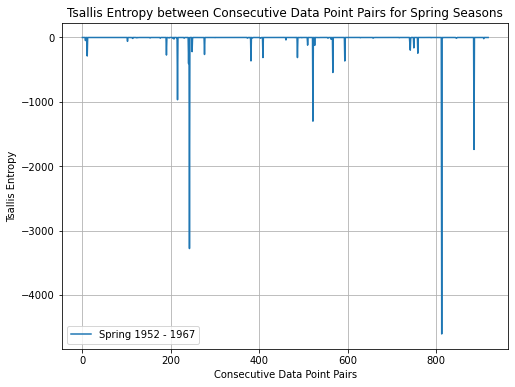

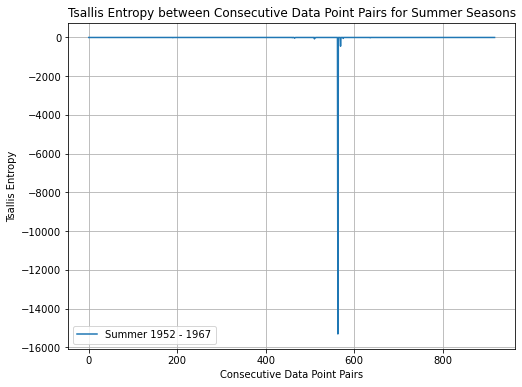

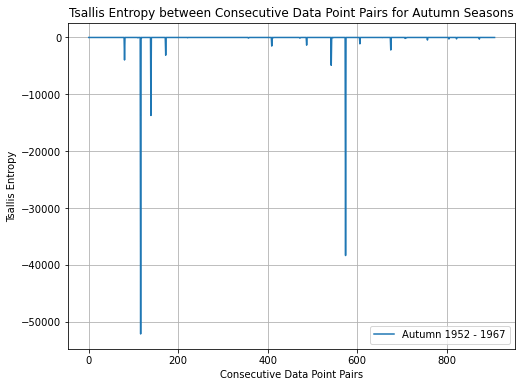

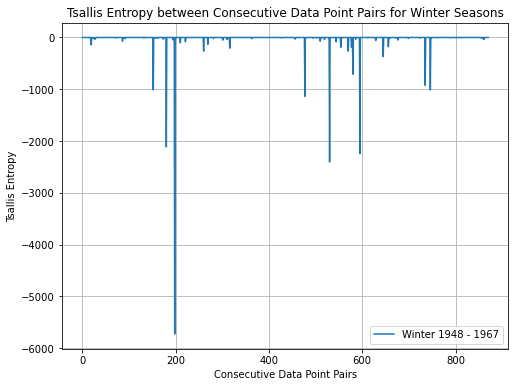

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV
df = pd.read_csv("3170.csv", parse_dates=["DATE"])

# Filter data between the specified dates
filtered_df = df[(df["DATE"] >= "1948-12-01") & (df["DATE"] <= "1967-11-30")]

# Define the seasons
seasons = {
    "spring": [3, 4, 5],  # March, April, May
    "summer": [6, 7, 8],  # June, July, August
    "autumn": [9, 10, 11],  # September, October, November
    "winter": [12, 1, 2]   # December, January, February
}

# Tsallis entropy function
def tsallis_entropy(data, q):
    probabilities = data / data.sum()
    return 1 / (q - 1) * (1 - (probabilities ** q).sum())

# Iterate over seasons
for season, months in seasons.items():
    season_df = filtered_df[filtered_df["DATE"].dt.month.isin(months)]
    
    # Get temperature values for the season
    temperature_values = season_df["VALUE"].values  # Replace with your actual temperature column name
    
    # Calculate temperature differences between consecutive data points
    temperature_diff = np.diff(temperature_values)
    
    # Calculate Tsallis entropy between consecutive data points
    tsallis_values = []
    for i in range(len(temperature_diff) - 1):
        tsallis = tsallis_entropy(np.array([temperature_diff[i], temperature_diff[i+1]]), q=2)  # Adjust q as needed
        
        # Handle invalid or unexpected values
        if np.isnan(tsallis) or np.isinf(tsallis):
            tsallis = 0  # Set a default value or handle as appropriate
        tsallis_values.append(tsallis)
    
    # Revert the order of Tsallis entropy values for plotting
    #tsallis_values.reverse()
    
    # Create a DataFrame to save Tsallis entropy values
    tsallis_df = pd.DataFrame({
        "Tsallis_Entropy": tsallis_values
    })
    
    # Save the Tsallis entropy values in a CSV file
    tsallis_filename = f"{season}_tsallis_values.csv"
    tsallis_df.to_csv(tsallis_filename, index=False)
    
    # Plot the Tsallis entropy values
    plt.figure(figsize=(8, 6))
    plt.plot(tsallis_values, label=f"{season.capitalize()} {season_df['DATE'].dt.year.min()} - {season_df['DATE'].dt.year.max()}")
    plt.xlabel("Consecutive Data Point Pairs")
    plt.ylabel("Tsallis Entropy")
    plt.title(f"Tsallis Entropy between Consecutive Data Point Pairs for {season.capitalize()} Seasons")
    plt.legend()
    plt.grid()
    plt.savefig(f"{season}_tsallis_plot.png")
    plt.show()


In [178]:
import pandas as pd

# Define the seasons
seasons = ["spring", "summer", "autumn", "winter"]

for season in seasons:
    # Load the data from {season}.csv and {season}.REV.csv files
    df_original = pd.read_csv(f"{season}_tsallis_values.csv")
    df_reversed = pd.read_csv(f"{season}_tsallis_valuesREV.csv")

    # Ensure both datasets have the same shape. If not, you might want to address why.
    assert df_original.shape == df_reversed.shape, f"Mismatched shape for {season}"

    # Calculate the symmetrical sum and store it in a new DataFrame 'sym'
    sym = pd.DataFrame()
    #sym['DATE'] = df_original['DATE']
    sym['SUM'] = (df_original['Tsallis_Entropy'] - df_reversed['Tsallis_Entropy']) 

    # Print the 'sym' DataFrame for each season
    print(f"Symmetric sum for {season.capitalize()}:\n")
    print(sym)

    # Store the 'sym' DataFrame in a new CSV file named "{season}.SYMMETRIC.csv"
    sym.to_csv(f"{season}ANTISYMMETRICtsallis_values.csv", index=False)

print("Symmetric CSV files for each season have been created.")


Symmetric sum for Spring:

     SUM
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
913  0.0
914  0.0
915  0.0
916  0.0
917  0.0

[918 rows x 1 columns]
Symmetric sum for Summer:

          SUM
0   -0.444444
1    1.500000
2    0.000000
3    0.000000
4    0.000000
..        ...
913  0.000000
914  0.000000
915  0.000000
916 -1.500000
917  0.444444

[918 rows x 1 columns]
Symmetric sum for Autumn:

          SUM
0    2.380000
1   -0.366231
2    0.000000
3    0.000000
4    0.000000
..        ...
903  0.000000
904  0.000000
905  0.000000
906  0.366231
907 -2.380000

[908 rows x 1 columns]
Symmetric sum for Winter:

     SUM
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
866  0.0
867  0.0
868  0.0
869  0.0
870  0.0

[871 rows x 1 columns]
Symmetric CSV files for each season have been created.


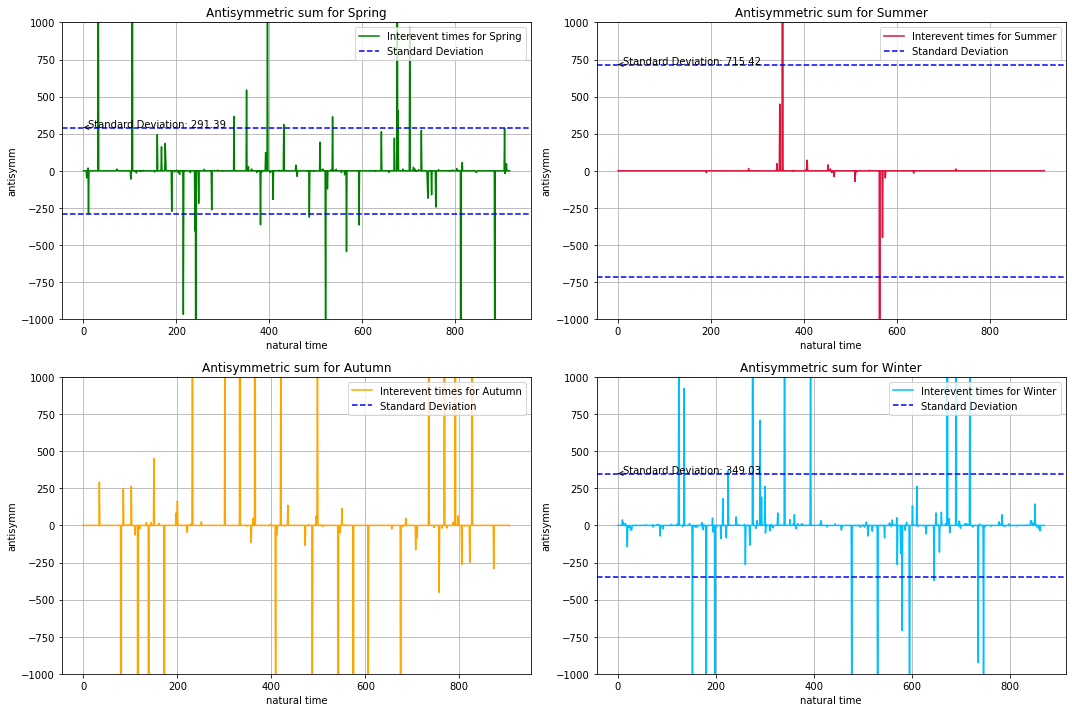

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons and their respective colors
seasons = ["spring", "summer", "autumn", "winter"]
colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}  # "celeste" is similar to light blue

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()  # Flatten the 2x2 grid to iterate easily

for ax, season in zip(axs, seasons):
    # Load the data from the "{season}.ANTISYMMETRIC.csv" file
    df = pd.read_csv(f"{season}ANTISYMMETRICtsallis_values.csv")
    
    # Plotting the data on the respective subplot axis
    ax.plot(df.index, df['SUM'], color=colors[season], label=f'Interevent times for {season.capitalize()}')
    
    # Compute the standard deviation
    std_dev = df['SUM'].std()
    
    # Plot the standard deviation as horizontal lines
    ax.axhline(std_dev, color='b', linestyle='--', label='Standard Deviation')
    ax.axhline(-std_dev, color='b', linestyle='--')
    
    # Annotate the standard deviation value on the plot
    ax.annotate(f'Standard Deviation: {std_dev:.2f}', xy=(0, std_dev), xytext=(10, std_dev + 1),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    ax.set_title(f'Antisymmetric sum for {season.capitalize()}')
    ax.set_xlabel('natural time')
    ax.set_ylabel('antisymm')
    ax.set_ylim(-1000,1000)
    ax.grid(True)
    ax.legend()

# Uncomment the line below if you want to save the figure
# fig.savefig('seasons.ANTISYMMETRIC_plot.jpg', dpi=300)

plt.tight_layout()
plt.show()


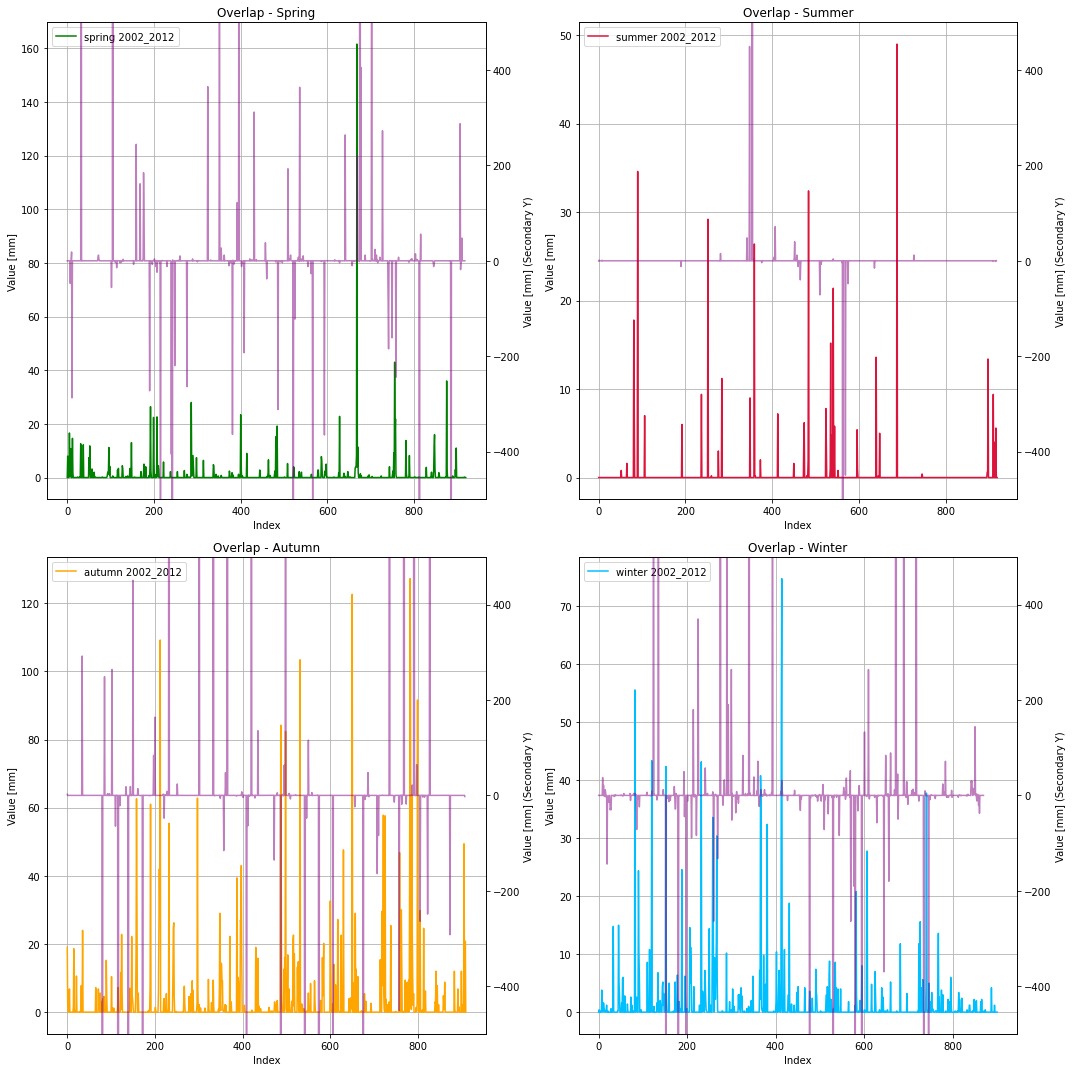

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15, 15))

# Define seasons and their reversed versions
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
season_tolerances = {"spring": 3, "summer": 1, "autumn": 5, "winter": 6}

for i, season in enumerate(seasons, start=1):
    df_original = pd.read_csv(f'{season}ANTISYMMETRICtsallis_values.csv')
    df_reversed = pd.read_csv(f'{season}2012_2022.csv')
    tolerance = season_tolerances[season]
    
    plt.subplot(2, 2, i)
    
    # Plot the data
    #plt.plot(df_original.index, df_original['SUM'], label=f'{season} 2012-2022', color=season_colors[season], alpha=0.5)
    plt.plot(df_reversed.index, df_reversed['VALUE'], label=f'{season} 2002_2012', color=season_colors[season], alpha=1)
    
   
    plt.xlabel('Index')
    plt.ylabel('Value [mm]')
    #plt.ylim(-10, 10)
    #plt.xlim(0, 185)
    plt.title(f'Overlap - {season.capitalize()}')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    # Create a secondary y-axis for the original dataframe
    ax2 = plt.gca().twinx()
    ax2.plot(df_original.index, df_original['SUM'], label=f'{season} 2012-2022 (Secondary Y)', color='purple', alpha=0.5)
    ax2.set_ylabel('Value [mm] (Secondary Y)')
    ax2.set_ylim(-500,500)
    
    
    

# Adjust the layout
plt.tight_layout()
plt.show()


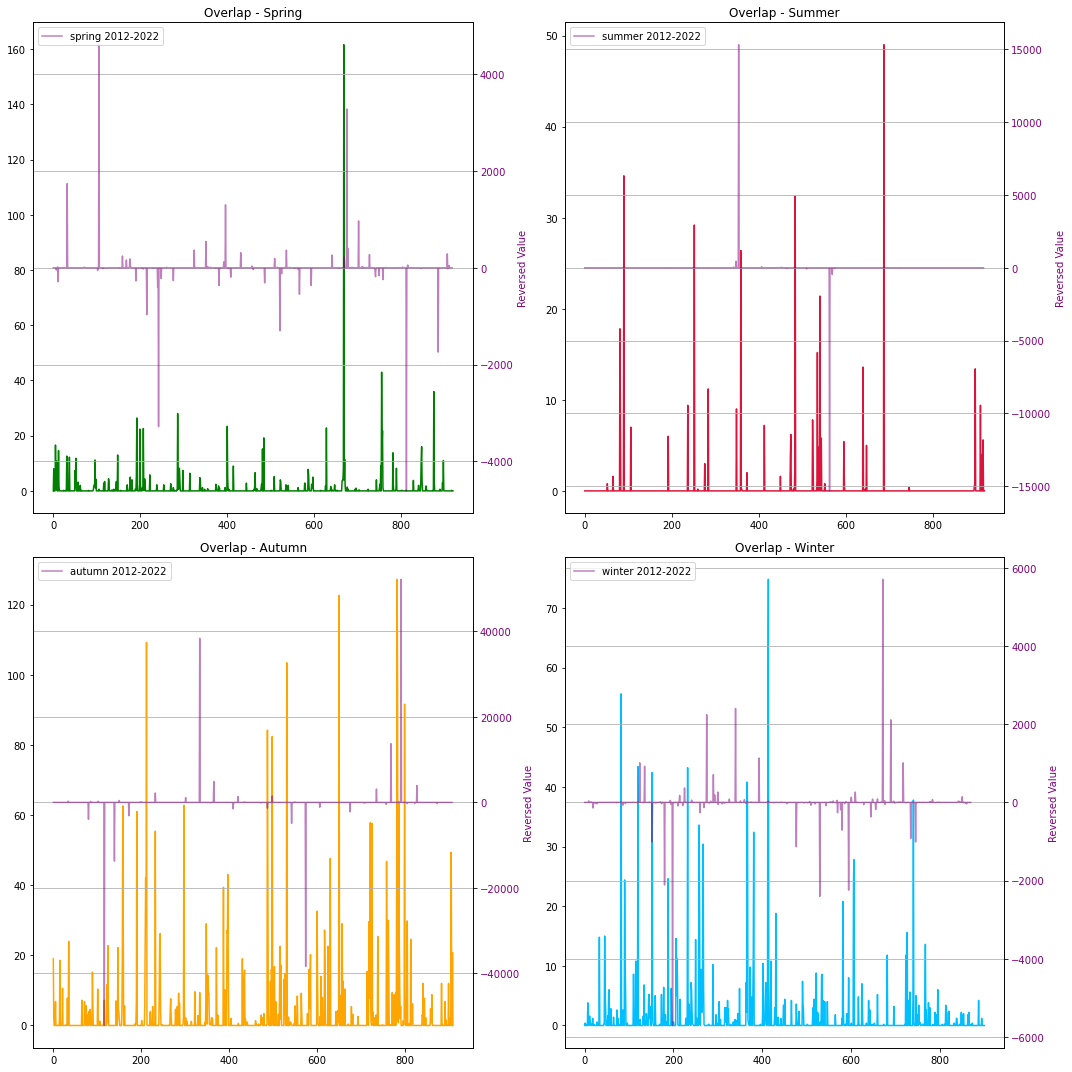

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15, 15))

# Define seasons and their reversed versions
seasons = ["spring", "summer", "autumn", "winter"]
season_colors = {"spring": "green", "summer": "crimson", "autumn": "orange", "winter": "deepskyblue"}
season_tolerances = {"spring": 3, "summer": 1, "autumn": 5, "winter": 6}

for i, season in enumerate(seasons, start=1):
    df_original = pd.read_csv(f'{season}ANTISYMMETRICtsallis_values.csv')
    df_reversed = pd.read_csv(f'{season}2012_2022.csv')
    tolerance = season_tolerances[season]
    
    plt.subplot(2, 2, i)
    
    # Plot the data
    plt.plot(df_reversed.index, df_reversed['VALUE'], label=f'{season} 2002_2012', color=season_colors[season], alpha=1)
    
    # Plot the original dataframe values with a different y-axis
    ax2 = plt.gca().twinx()
    ax2.plot(df_original.index, df_original['SUM'], label=f'{season} 2012-2022', color='purple', alpha=0.5)
    ax2.set_ylabel('Original Value [mm]', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
   
    plt.xlabel('Index')
    plt.ylabel('Reversed Value')
    plt.title(f'Overlap - {season.capitalize()}')
    plt.legend(loc='upper left')
    plt.grid(True)
    
# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:
END

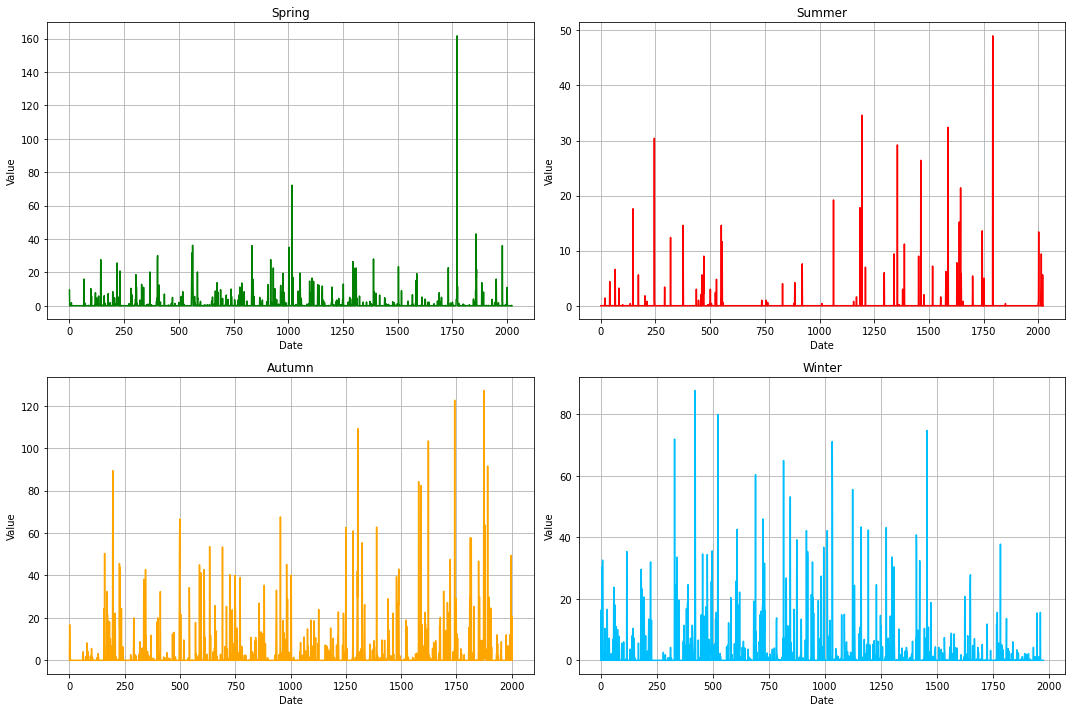

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons and their respective colors
seasons = ["spring", "summer", "autumn", "winter"]
colors = {
    "spring": "green",
    "summer": "red",
    "autumn": "orange",
    "winter": "deepskyblue"  # "celeste" is similar to light blue
}

# Initialize a figure with a grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mapping seasons to subplot indices
season_to_idx = {
    "spring": (0, 0),
    "summer": (0, 1),
    "autumn": (1, 0),
    "winter": (1, 1)
}

# Iterate over seasons to plot them on the grid
for season in seasons:
    df = pd.read_csv(f"{season}.csv", parse_dates=["DATE"])
    
    ax = axes[season_to_idx[season]]
    ax.plot(df.index, df["VALUE"], label=season, color=colors[season])  # Use the color for the current season
    
    ax.set_title(season.capitalize())
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


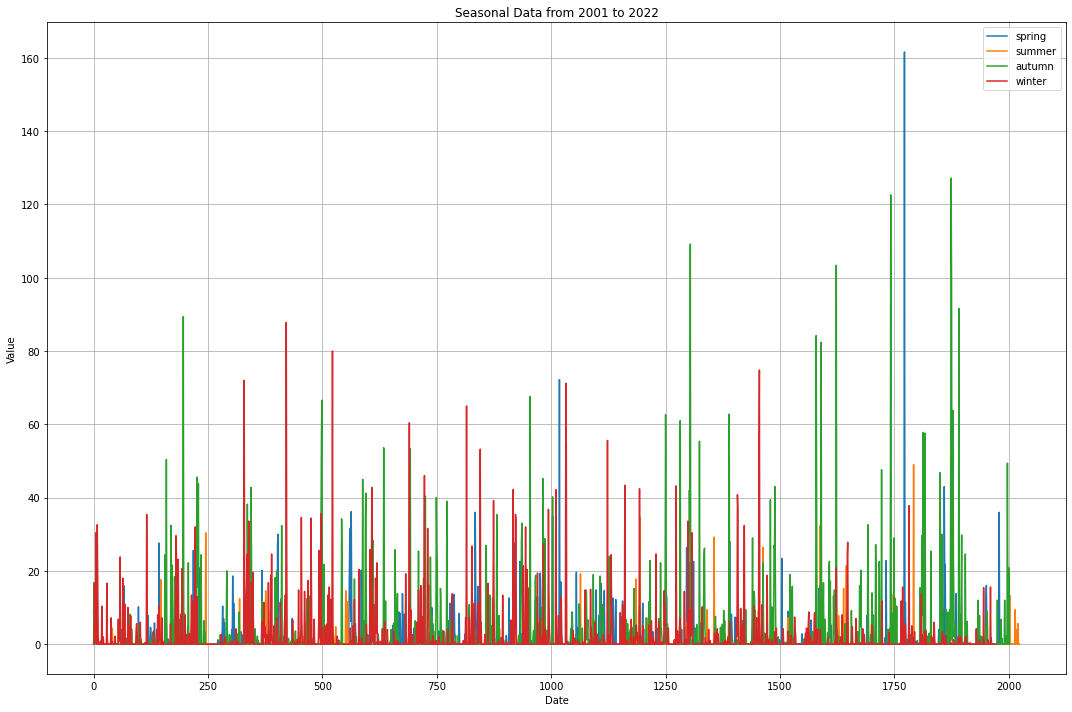

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons
seasons = ["spring", "summer", "autumn", "winter"]

# Initialize a figure
plt.figure(figsize=(15, 10))

# Iterate over seasons to plot them
for season in seasons:
    df = pd.read_csv(f"{season}.csv", parse_dates=["DATE"])
    plt.plot(df.index, df["VALUE"], label=season)

# Set title and labels
plt.title("Seasonal Data from 2001 to 2022")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()


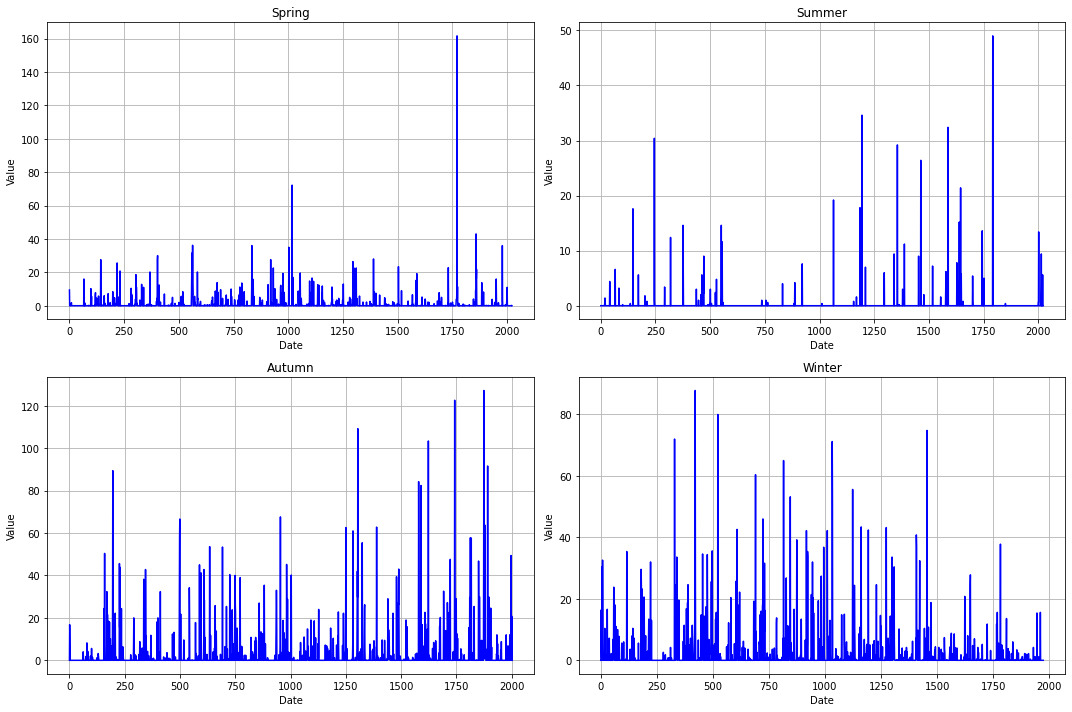

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons
seasons = ["spring", "summer", "autumn", "winter"]

# Initialize a figure with a grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mapping seasons to subplot indices
season_to_idx = {
    "spring": (0, 0),
    "summer": (0, 1),
    "autumn": (1, 0),
    "winter": (1, 1)
}

# Iterate over seasons to plot them on the grid
for season in seasons:
    df = pd.read_csv(f"{season}.csv", parse_dates=["DATE"])
    
    ax = axes[season_to_idx[season]]
    ax.plot(df.index, df["VALUE"], label=season, color='blue') # change color as needed
    
    ax.set_title(season.capitalize())
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


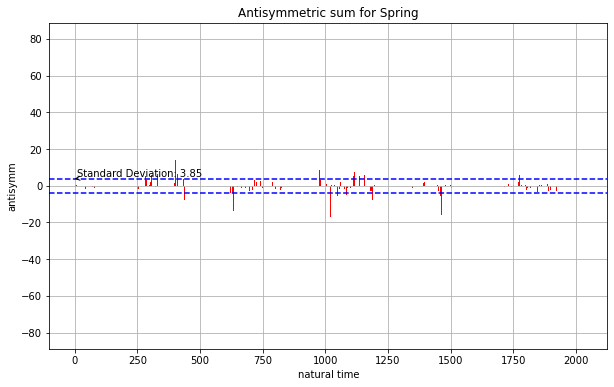

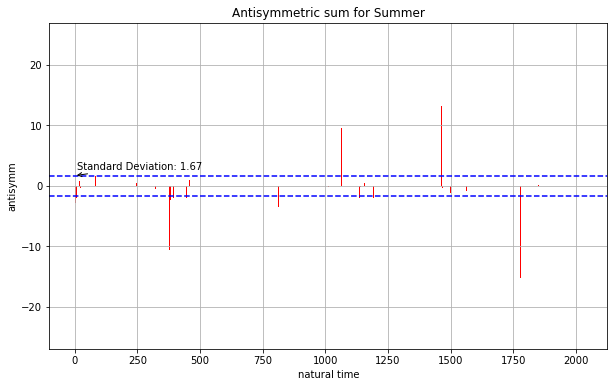

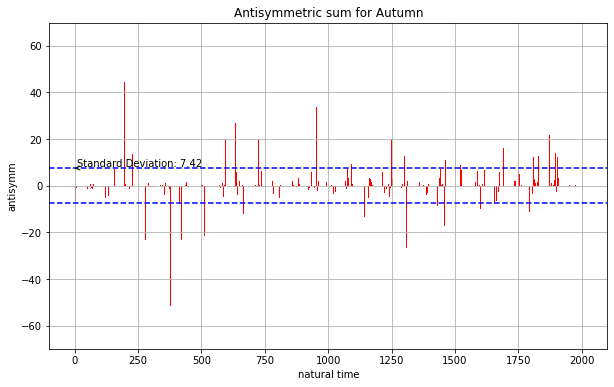

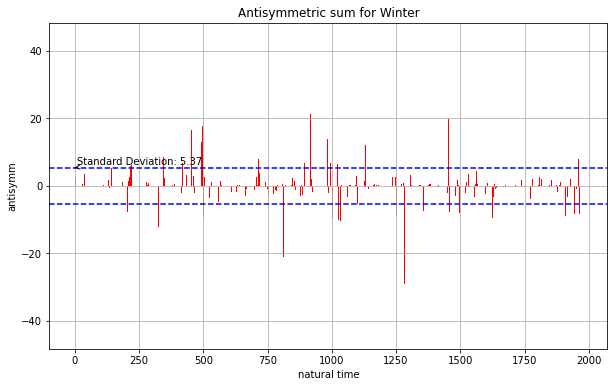

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seasons
seasons = ["spring", "summer", "autumn", "winter"]

for season in seasons:
    # Load the data from the "{season}.SYMMETRIC.csv" file
    df = pd.read_csv(f"{season}.ANTISYMMETRIC.csv")
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    
    plt.bar(df.index, df['SUM'], color='r', label=f'Interevent times for {season.capitalize()}', width=0.6)
    
    # Compute the standard deviation
    std_dev = df['SUM'].std()
    
    # Plot the standard deviation as horizontal lines
    plt.axhline(std_dev, color='b', linestyle='--', label='Standard Deviation')
    plt.axhline(-std_dev, color='b', linestyle='--')
    
    # Annotate the standard deviation value on the plot
    plt.annotate(f'Standard Deviation: {std_dev:.2f}', xy=(0, std_dev), xytext=(10, std_dev + 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.title(f'Antisymmetric sum for {season.capitalize()}')
    plt.xlabel('natural time')
    plt.ylabel('antisymm')
    plt.grid(True)
    
    # Uncomment the line below if you want to save the figure
    #plt.savefig(f'{season}.ANTISYMMETRIC_plot.jpg', dpi=300)
    
    plt.show()


In [38]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('3170.csv')

# Display data types of each column
print(df.dtypes)

DATE      object
VALUE    float64
dtype: object


In [43]:
import pandas as pd
from datetime import datetime

# Read the input file
with open('2023.txt', 'r') as input_file:
    lines = input_file.readlines()

# Extract the third and fifth columns
extracted_data = []
for line in lines:
    parts = line.strip().split(';')
    if len(parts) >= 5 and parts[0] != 'Stazione':
        raw_date = parts[2].replace('/', '-')  # Replace "/" with "-" in the date
        date_obj = datetime.strptime(raw_date, '%d-%m-%Y')  # Convert to datetime object
        formatted_date = date_obj.strftime('%Y-%m-%d')  # Format as "year-month-day"
        value = parts[4].replace(',', '.')  # Replace comma with period for decimal
        extracted_data.append((formatted_date, value))

# Write the extracted data to a new CSV file
with open('2023.csv', 'w') as output_file:
    output_file.write("Data rilevazione,Valore\n")  # Write header
    for data in extracted_data:
        output_file.write(f'{data[0]},{data[1]}\n')

print("Extraction and conversion completed. Data saved in '2023.csv'.")


Extraction and conversion completed. Data saved in '2023.csv'.
